# ❤️ Heart Disease Prediction System using Machine Learning




---

# 📄 Project Metadata
### **Title:** **Heart Disease Prediction using Machine Learning** ❤️‍🩹
### **Author:** **Asad Ali** ✍️
### **Institute:** **University of Okara & Trainee at Codanics** 🎓
### **Email:** 📧 [asadalyy834@gmail.com](mailto:asadalyy834@gmail.com)
### **Course:** **Data Science / Machine Learning** 📊🧠
### **Date:** **July 2025** 📅
### **Version:** **1.0** 🔢
### **Language:** **Python** 🐍
### **Libraries Overview:**
- **Pandas** 📚: Data manipulation and analysis
- **NumPy** 🔢: Numerical computing
- **Scikit-learn** ⚙️: Machine learning tools and algorithms
- **Matplotlib** 📈: Data visualization
- **Seaborn** 🌊: Statistical data visualization
- **Plotly** 📊: Interactive data visualization
### **Dataset:** **UCI Heart Disease Dataset from Kaggle** 📋

---


# 📊 About the Dataset

### 🧬 Context

This is a **multivariate dataset** — it contains multiple statistical variables and supports numerical data analysis. Although the full dataset includes **76 attributes**, most published research focuses on **14 key features**.

- 📍 **Primary Source Used:** *Cleveland database* — the most commonly used by machine learning researchers.
- 🧠 **Main Objective:** Predict whether a patient has heart disease or not based on medical parameters.
- 🔎 **Secondary Objective:** Gain diagnostic insights through statistical and machine learning exploration.

---

### 📌 Selected Attribute Descriptions (14 Core Features)

| 🔢 No. | 🧬 Column Name | 📖 Description                                                                 |
|-------:|---------------|--------------------------------------------------------------------------------|
| 1️⃣    | `age`         | Age of the patient (in years)                                                  |
| 2️⃣    | `sex`         | Gender of patient (`0` = Female, `1` = Male)                                   |
| 3️⃣    | `cp`          | Chest pain type: `typical angina`, `atypical angina`, `non-anginal`, `asymptomatic` |
| 4️⃣    | `trestbps`    | Resting blood pressure (in mm Hg at admission)                                 |
| 5️⃣    | `chol`        | Serum cholesterol level (in mg/dl)                                             |
| 6️⃣    | `fbs`         | Fasting blood sugar > 120 mg/dl (`1` = True; `0` = False)                       |
| 7️⃣    | `restecg`     | ECG results: `normal`, `ST-T abnormality`, `left ventricular hypertrophy`      |
| 8️⃣    | `thalach`     | Maximum heart rate achieved                                                    |
| 9️⃣    | `exang`       | Exercise-induced angina (`1` = Yes; `0` = No)                                   |
| 🔟     | `oldpeak`     | ST depression induced by exercise relative to rest                             |
| 1️⃣1️⃣ | `slope`       | Slope of the peak exercise ST segment                                          |
| 1️⃣2️⃣ | `ca`          | Number of major vessels (0–3) colored by fluoroscopy                           |
| 1️⃣3️⃣ | `thal`        | Thalassemia condition: `normal`, `fixed defect`, `reversible defect`           |
| 1️⃣4️⃣ | `target/num`  | Predicted attribute (0 = No Disease, 1 = Heart Disease)                         |

---

### 🧾 Additional Columns (May Appear in Extended Datasets)

| 🔹 Column        | 🔍 Description                              |
|------------------|--------------------------------------------|
| `id`             | Unique ID for each patient                 |
| `dataset`         | Source location of data (e.g., Hungary)   |

---

### 👨‍⚕️ Acknowledgements

**Contributors & Medical Institutions:**

- 🏥 *Hungarian Institute of Cardiology, Budapest*: **Dr. Andras Janosi**  
- 🏥 *University Hospital, Zurich, Switzerland*: **Dr. William Steinbrunn**  
- 🏥 *University Hospital, Basel, Switzerland*: **Dr. Matthias Pfisterer**  
- 🏥 *V.A. Medical Center, Long Beach & Cleveland Clinic*: **Dr. Robert Detrano**

---

### 📚 Relevant Research Papers

- 📄 *International application of a new probability algorithm for the diagnosis of coronary artery disease*  
  ➤ *Detrano, R. et al., American Journal of Cardiology, 1989*

- 📄 *Instance-based prediction of heart-disease presence with the Cleveland database*  
  ➤ *David W. Aha & Dennis Kibler*

- 📄 *Models of incremental concept formation*  
  ➤ *Gennari, J.H., Langley, P., & Fisher, D., Artificial Intelligence, 1989*

---

### 🙏 Citation Request

> The authors request that any publication using this dataset must credit the principal investigators:
> 
> - **Dr. Andras Janosi** – Hungarian Institute of Cardiology  
> - **Dr. William Steinbrunn** – University Hospital, Zurich  
> - **Dr. Matthias Pfisterer** – University Hospital, Basel  
> - **Dr. Robert Detrano** – Cleveland Clinic Foundation & Long Beach VA Medical Center

---



# 1. 📚 Importing Libraries

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [155]:
# Setting to Display max rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Setting to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [156]:
# Let's Load the Dataset that is in our local directory
df = pd.read_csv("heart_disease_uci.csv")
# Let's have a look at the first few rows of the dataset
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [157]:
# Getting the info of our Dataset
print("Information about the Dataset")
print(df.info())

Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [158]:
# Check the Shape of the Dataset
print("Shape of the Dataset")
print("The Dataset has", df.shape[0], "rows and", df.shape[1], "columns.")

Shape of the Dataset
The Dataset has 920 rows and 16 columns.


-----

# 2. Data Preprocessing 🔍
## 1. **Handling Missing Values:** Fill or drop missing data.




In [159]:
# Let's First check for missing values in our dataset
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values in the Dataset:")
print(missing_values[missing_values > 0])

Missing Values in the Dataset:
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64


In [160]:
# Check the percentage of missing values in our dataset
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False))

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
cp           0.000000
dataset      0.000000
id           0.000000
age          0.000000
sex          0.000000
num          0.000000
dtype: float64


In [161]:
# Let's check the type of each column that has missing values in our dataset.
print("Data Types of Columns with Missing Values:")
print(df.dtypes[missing_values[missing_values > 0].index])

Data Types of Columns with Missing Values:
ca          float64
thal         object
slope        object
fbs          object
oldpeak     float64
trestbps    float64
exang        object
thalch      float64
chol        float64
restecg      object
dtype: object


In [162]:
# Let's impute missing values that have int or float data types using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)
# Replacing the original numeric columns with the imputed ones
df[df.select_dtypes(include=[np.number]).columns] = df_imputed
# Let's again have a look at the missing values after imputation of numeric columns
missing_values_after_imputation = df.isnull().sum().sort_values(ascending=False)
print("Missing Values in the Dataset after Imputation:")
print(missing_values_after_imputation[missing_values_after_imputation > 0])


Missing Values in the Dataset after Imputation:
thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64


In [163]:
# Let's again check the datatype of each column that contain missing values after imputation of numeric columns
print("Data Types of Columns with Missing Values after Imputation:")
print(df.dtypes[missing_values_after_imputation[missing_values_after_imputation > 0].index])


Data Types of Columns with Missing Values after Imputation:
thal       object
slope      object
fbs        object
exang      object
restecg    object
dtype: object


In [164]:
# Encode , Impute and Decode using ML Model
def encode_and_rf_impute(df):
    df_copy = df.copy()
    # Encode object columns
    label_encoders = {}
    object_cols = df_copy.select_dtypes(include=['object']).columns
    for col in object_cols:
        le = LabelEncoder()
        df_copy[col] = le.fit_transform(df_copy[col].astype(str))
        label_encoders[col] = le

    # Impute object columns using RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    for col in object_cols:
        missing = df[col].isnull()
        if missing.any():
            not_missing = ~missing
            X_train = df_copy.loc[not_missing].drop(columns=[col])
            y_train = df_copy.loc[not_missing, col]
            X_pred = df_copy.loc[missing].drop(columns=[col])
            clf = RandomForestClassifier(n_estimators=100, random_state=0)
            clf.fit(X_train, y_train)
            df_copy.loc[missing, col] = clf.predict(X_pred)

    # Decode object columns back to original values
    for col, le in label_encoders.items():
        df_copy[col] = le.inverse_transform(df_copy[col].round().astype(int))

    return df_copy

# Apply the function using RandomForestClassifier for categorical columns
df  = encode_and_rf_impute(df)
print("Missing Values in the Dataset after Encoding and RF Imputation:")
print(df.isnull().sum())


Missing Values in the Dataset after Encoding and RF Imputation:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [165]:
# Let's again check the few random rows of the dataset after encoding and imputation
print("Random Rows of the Dataset after Encoding and Imputation:")
print(df.sample(5))

Random Rows of the Dataset after Encoding and Imputation:
        id   age     sex        dataset               cp  trestbps   chol  \
279  280.0  58.0  Female      Cleveland     asymptomatic     130.0  197.0   
537  538.0  48.0    Male        Hungary     asymptomatic     160.0  193.0   
783  784.0  56.0    Male  VA Long Beach      non-anginal     170.0    0.0   
544  545.0  54.0    Male        Hungary      non-anginal     120.0  237.0   
490  491.0  62.0    Male        Hungary  atypical angina     140.0  271.0   

       fbs         restecg  thalch  exang  oldpeak        slope   ca  \
279  False          normal   131.0  False      0.6         flat  0.0   
537  False          normal   102.0   True      3.0         flat  0.2   
783  False  lv hypertrophy   123.0   True      2.5  downsloping  1.0   
544  False          normal   150.0   True      1.5         flat  0.2   
490  False          normal   152.0  False      1.0    upsloping  0.2   

                  thal  num  
279             

In [166]:
# Getting the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    float64
dtypes: float64(8), object(8)
memory usage: 115.1+ KB


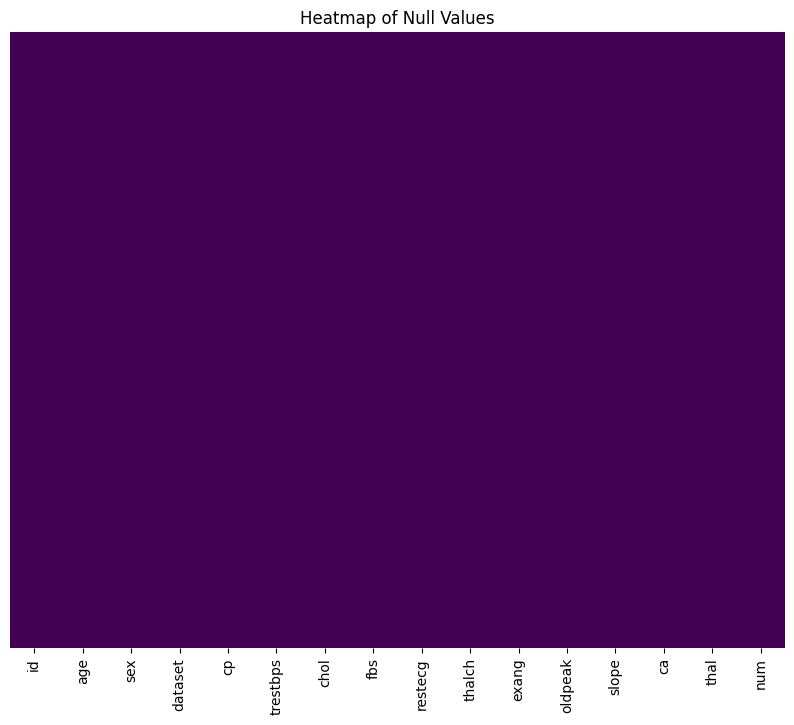

In [167]:

# Check for null values
null_values = df.isnull()

# Create a heatmap of null values
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(null_values, cmap='viridis', cbar=False, yticklabels=False)

# Show the plot
plt.title('Heatmap of Null Values')
plt.show()

- ###  Missing values ka rola howa khtm 😎 

## 2. **Cleaning:** Remove duplicates and handle outliers.

In [168]:
# Let's check for duplicates in our dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in the dataset: {duplicates}")

Number of duplicate rows in the dataset: 0


- ### There is no Duplicates in our Dataset.

**🏁 Data Cleaning Mission: Complete!**

All data cleaning steps have been successfully performed:
- Duplicate records have been checked and not found.
- We will deal Outliers in the Exploratory Data Analysis.

Our dataset is now clean, reliable, and ready for Machine learning and Statistical analysis.

# 3. 📊 Exploratory Data Analysis (EDA) 🔍

In [169]:
# Let's look at the tail of Dataset
print(df.tail())

        id   age     sex        dataset               cp  trestbps   chol  \
915  916.0  54.0  Female  VA Long Beach     asymptomatic     127.0  333.0   
916  917.0  62.0    Male  VA Long Beach   typical angina     148.8  139.0   
917  918.0  55.0    Male  VA Long Beach     asymptomatic     122.0  223.0   
918  919.0  58.0    Male  VA Long Beach     asymptomatic     136.2  385.0   
919  920.0  62.0    Male  VA Long Beach  atypical angina     120.0  254.0   

       fbs           restecg  thalch  exang  oldpeak slope   ca  \
915   True  st-t abnormality   154.0  False      0.0  flat  1.0   
916  False  st-t abnormality   133.2   True      1.8  flat  1.0   
917   True  st-t abnormality   100.0  False      0.0  flat  1.2   
918   True    lv hypertrophy   133.4  False      0.6  flat  0.8   
919  False    lv hypertrophy    93.0   True      0.0  flat  1.2   

                  thal  num  
915             normal  1.0  
916  reversable defect  0.0  
917       fixed defect  2.0  
918  reversabl

In [170]:
# Let's investigate the Age column
print("Minimum Age of Patient is", df["age"].min())
print("Minimum Age of Patient is ", df["age"].max())

Minimum Age of Patient is 28.0
Minimum Age of Patient is  77.0


In [171]:
# Taking the number of unique values of Age column
print(df["age"].nunique())

50


In [172]:
# Getting the statistical summary of age.
print(df["age"].describe())

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64


In [173]:
# Let's check the how many males and females have heart disease.
print(df["sex"].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64


In [174]:
# Total number of males and females in the dataset
sex_counts = df['sex'].value_counts()
male_total = sex_counts.get(0, 0)
female_total = sex_counts.get(1, 0)

print(f"Total males: {male_total}")
print(f"Total females: {female_total}")

# Calculate percentage of males and females
total_people = male_total + female_total
if total_people > 0:
    male_percent = (male_total / total_people) * 100
    female_percent = (female_total / total_people) * 100
    print(f"Percentage of males: {male_percent:.2f}%")
    print(f"Percentage of females: {female_percent:.2f}%")
else:
    print("No Data Available")

Total males: 726
Total females: 194
Percentage of males: 78.91%
Percentage of females: 21.09%


In [175]:
# Let's jump into dataset column
print(df["dataset"].unique())  # This line will show the unique values in the 'dataset' column
# Getting the value count of the 'dataset' column
print(df["dataset"].value_counts())

['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


In [187]:
import os
from IPython.display import IFrame
import plotly.graph_objects as go

# Create a function to save a figure
def save_figure(fig, folder, filename):
    if not os.path.exists(folder):
        os.makedirs(folder)
    fig_path = os.path.join(folder, filename)
    fig.write_html(fig_path)  # Save as HTML for interactivity
    return fig_path

# Create a function to display the saved interactive figure
def display_interactive_image(html_path):
    display(IFrame(html_path, width=700, height=500))


In [188]:
# Age bins for 28-77 range
age_bins = [28, 35, 40, 45, 50, 55, 60, 65, 70, 75, 77]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=[
    '28-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-75', '76-77'
])

# Group by dataset, sex, and age_group for counts
grouped = df.groupby(['dataset', 'sex', 'age_group']).size().reset_index(name='count')

# Plotly bar plot: hover shows gender, age bin, and count
fig1 = px.bar(
    grouped,
    x='dataset',
    y='count',
    color='sex',
    barmode='group',
    title='Patients Count by Dataset, Gender, and Age Group',
    hover_data=['sex', 'age_group', 'count']
)
fig1.update_layout(
    xaxis_title="Dataset",
    yaxis_title="Count",
    legend_title_text="Gender"
)

# Save the figure
folder_name = 'Heart_Disease_Predictor/figures'  # Folder to save the image
figure_name = 'my_figure1.html'  # Change this to your desired figure name
saved_path = save_figure(fig1, folder_name, figure_name)

# Display the saved interactive figure
display_interactive_image(saved_path)

In [99]:
# Let's again check the first few rows of dataset
print(df.head())


    id   age     sex    dataset               cp  trestbps   chol    fbs  \
0  1.0  63.0    Male  Cleveland   typical angina     145.0  233.0   True   
1  2.0  67.0    Male  Cleveland     asymptomatic     160.0  286.0  False   
2  3.0  67.0    Male  Cleveland     asymptomatic     120.0  229.0  False   
3  4.0  37.0    Male  Cleveland      non-anginal     130.0  250.0  False   
4  5.0  41.0  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num age_group  
0       fixed defect  0.0     60-64  
1             normal  2.0     65-69  
2  reversable defect  1.0     65-69  
3           

In [100]:
# Getting the value count of cp
print(df["cp"].value_counts())

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


In [189]:
# This code calculates the median age for each chest pain type and sex, 
# then creates a grouped bar plot to visualize the average age by chest pain type and sex.
# Calculate the average age for each chest pain type and sex
average_age = df.groupby(['cp', 'sex'])['age'].median().round(0).astype(int).reset_index()

# Bar Plot using Plotly
fig2 = px.bar(average_age, 
             x='cp', 
             y='age', 
             color='sex',
             barmode='group',
             title='Average Age by Chest Pain Type and Sex',
             labels={'age': 'Average Age', 'chest_pain': 'Chest Pain Type'})
# Save the figure
folder_name = 'Heart_Disease_Predictor/figures'  # Folder to save the image
figure_name = 'my_figure2.html'  # Change this to your desired figure name
saved_path = save_figure(fig2, folder_name, figure_name)

# Display the saved interactive figure
display_interactive_image(saved_path)


In [102]:
# Let's view the tresbps using boxplot
# Create a box plot
fig = px.box(df, y='trestbps', title='Box Plot of Resting Blood Pressure (trestbps)',
             labels={'trestbps': 'Resting Blood Pressure (trestbps)'})

# Show the plot
fig.show()

# Handling the Outliers of trestbps(Resting Blood Pressure of Patients)                

In [103]:
# I see and study thorougly i decided to drop trestbps column at these specific rows where i found outliers.
df.drop(df[df["trestbps"] == 0].index, inplace=True)
df.drop(df[df["trestbps"] == 80].index, inplace=True)
df.drop(df[(df["trestbps"] == 178) & (df["chol"] == 0)].index, inplace=True)
df.drop(df[(df["trestbps"] == 180) & (df["chol"] == 0)].index, inplace=True)
df.drop(df[df["trestbps"] == 185].index, inplace=True)
df.drop(df[(df["trestbps"] == 200) & (df["chol"] == 0)].index, inplace=True)

In [104]:
# Let's view the tresbps using boxplot
# Create a box plot
fig = px.box(df, y='trestbps', title='Box Plot of Resting Blood Pressure (trestbps) after removing of Outliers',
             labels={'trestbps': 'Resting Blood Pressure (trestbps)'})

# Show the plot
fig.show()

In [105]:
# Let's investigate the trestbps column
print("The average resting blood pressure of patients is", df['trestbps'].mean().astype(int))
print("The maximum resting blood pressure of a patient is", df['trestbps'].max().astype(int))
print("The minimum resting blood pressure of a patient is", df['trestbps'].min().astype(int))

The average resting blood pressure of patients is 132
The maximum resting blood pressure of a patient is 200
The minimum resting blood pressure of a patient is 92


In [106]:
# Calculate the mean resting blood pressure for males
mean_trestbps_male = df[df['sex'] == 'Male']['trestbps'].mean().astype(int)
# Calculate maximum and minimum resting blood pressure for males
max_trestbps_male = df[df['sex'] == 'Male']['trestbps'].max().astype(int)
min_trestbps_male = df[df['sex'] == 'Male']['trestbps'].min().astype(int)

# Calculate the mean resting blood pressure for females
mean_trestbps_female = df[df['sex'] == 'Female']['trestbps'].mean().astype(int)
# Calculate maximum and minimum resting blood pressure for females
max_trestbps_female = df[df['sex'] == 'Female']['trestbps'].max().astype(int)
min_trestbps_female = df[df['sex'] == 'Female']['trestbps'].min().astype(int)

# Display the results
print(f"Mean Resting Blood Pressure for Males: {mean_trestbps_male}")
print(f"Maximum Resting Blood Pressure for Males: {max_trestbps_male}")
print(f"Minimum Resting Blood Pressure for Males: {min_trestbps_male}")
print("-----------------------------")

# Display the results
print(f"Mean Resting Blood Pressure for Females: {mean_trestbps_female}")
print(f"Maximum Resting Blood Pressure for Females: {max_trestbps_female}")
print(f"Minimum Resting Blood Pressure for Females: {min_trestbps_female}")



Mean Resting Blood Pressure for Males: 132
Maximum Resting Blood Pressure for Males: 200
Minimum Resting Blood Pressure for Males: 92
-----------------------------
Mean Resting Blood Pressure for Females: 131
Maximum Resting Blood Pressure for Females: 200
Minimum Resting Blood Pressure for Females: 94


In [107]:
print(df['dataset'].value_counts())

dataset
Cleveland        304
Hungary          293
VA Long Beach    197
Switzerland      118
Name: count, dtype: int64


In [108]:
# Calculating the average resting blood pressure of patients by dataset. 
mean_trestbps_clev = df[df['dataset'] == 'Cleveland']['trestbps'].mean().astype(int)
mean_trestbps_hung = df[df['dataset'] == 'Hungary']['trestbps'].mean().astype(int)
mean_trestbps_va = df[df['dataset'] == 'VA Long Beach']['trestbps'].mean().astype(int)
mean_trestbps_swiss = df[df['dataset'] == 'Switzerland']['trestbps'].mean().astype(int)
print(f"Mean Resting Blood Pressure of Patients of Cleveland: {mean_trestbps_clev}")
print(f"Mean Resting Blood Pressure of Patients of Hungary: {mean_trestbps_hung}")
print(f"Mean Resting Blood Pressure of Patients of VA Long Beech: {mean_trestbps_va}")
print(f"Mean Resting Blood Pressure of Patients of Switzerland: {mean_trestbps_swiss}")
  

Mean Resting Blood Pressure of Patients of Cleveland: 131
Mean Resting Blood Pressure of Patients of Hungary: 132
Mean Resting Blood Pressure of Patients of VA Long Beech: 134
Mean Resting Blood Pressure of Patients of Switzerland: 128


In [109]:
# Prepare data for the pie chart
mean_values = {
    'Cleveland': mean_trestbps_clev,
    'Hungary': mean_trestbps_hung,
    'VA Long Beach': mean_trestbps_va,
    'Switzerland': mean_trestbps_swiss
}

# Create a DataFrame for Plotly
mean_df = pd.DataFrame(mean_values.items(), columns=['Dataset', 'Mean Trestbps'])

# Create a pie chart
fig = px.pie(mean_df, values='Mean Trestbps', names='Dataset', 
             title='Mean Resting Blood Pressure by Dataset')

# Show the plot
fig.show()

In [110]:
# Again look on the Data
print(df.head())

    id   age     sex    dataset               cp  trestbps   chol    fbs  \
0  1.0  63.0    Male  Cleveland   typical angina     145.0  233.0   True   
1  2.0  67.0    Male  Cleveland     asymptomatic     160.0  286.0  False   
2  3.0  67.0    Male  Cleveland     asymptomatic     120.0  229.0  False   
3  4.0  37.0    Male  Cleveland      non-anginal     130.0  250.0  False   
4  5.0  41.0  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num age_group  
0       fixed defect  0.0     60-64  
1             normal  2.0     65-69  
2  reversable defect  1.0     65-69  
3           

In [111]:
# Let's jump into the chol column.
print("The average cholestrol level of patients is", df['chol'].mean().astype(int))
print("The maximum cholestrol level of a patient is", df['chol'].max().astype(int))
print("The minimum cholestrol level  of a patient is", df['chol'].min().astype(int))

The average cholestrol level of patients is 202
The maximum cholestrol level of a patient is 603
The minimum cholestrol level  of a patient is 0


In [112]:
# Let's view the cholestrol using interactive boxplot to find outliers
# Create a box plot
fig = px.box(df, y='chol', title='Box Plot of Cholestrol level (chol) of patients',
             labels={'chol': 'Cholestrol Level (chol)'})

# Show the plot
fig.show()

In [113]:
# Dropping some rows from dataset based on my cholestrol study
df.drop(df[df["chol"] == 0].index, inplace=True)
df.drop(df[df["chol"] == 518].index, inplace=True)
df.drop(df[df["chol"] == 529].index, inplace=True)
df.drop(df[df["chol"] == 564].index, inplace=True)
df.drop(df[df["chol"] == 603].index, inplace=True)

In [114]:
# Now i will use IQR method to clean the any other outlier.
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]

In [115]:
# Let's view the box plot after removing outliers of chol column.
# Let's view the cholestrol using interactive boxplot to find outliers
# Create a box plot
fig = px.box(df, y='chol', title='Box Plot of Cholestrol level (chol) of patients after removing Outliers',
             labels={'chol': 'Cholestrol Level (chol)'})

# Show the plot
fig.show()

In [116]:
# Let's jump into the chol column.
print("The average cholestrol level of patients is", df['chol'].mean().astype(int))
print("The maximum cholestrol level of a patient is", df['chol'].max().astype(int))
print("The minimum cholestrol level  of a patient is", df['chol'].min().astype(int))

The average cholestrol level of patients is 242
The maximum cholestrol level of a patient is 369
The minimum cholestrol level  of a patient is 117


In [117]:
print(df.groupby(["sex","dataset"])["chol"].mean().astype(int))

sex     dataset      
Female  Cleveland        252
        Hungary          238
        VA Long Beach    287
Male    Cleveland        239
        Hungary          246
        VA Long Beach    235
Name: chol, dtype: int64


In [118]:
# ✅ Step 1: Group by 'dataset' and 'sex'
df_grouped = df.groupby(['dataset', 'sex'])['chol'].mean().reset_index()

# Step 2: (Optional) Round or convert
df_grouped['chol'] = df_grouped['chol'].astype(int)

# ✅ Step 3: Plot bar chart
fig = px.bar(df_grouped,
             x='dataset',        # 🟡 X-axis is country
             y='chol',           # 🟢 Y-axis is average cholesterol
             color='sex',        # 🔵 Bars colored by sex
             barmode='group',    # Grouped bars (Male/Female side by side)
             title='Average Cholesterol by Sex in Each Country',
             labels={'chol': 'Avg Cholesterol', 'sex': 'Sex', 'dataset': 'Country'},
             hover_data=['chol'])

fig.show()


In [119]:
# let's again have a look on our dataset.
print(df.head())

    id   age     sex    dataset               cp  trestbps   chol    fbs  \
0  1.0  63.0    Male  Cleveland   typical angina     145.0  233.0   True   
1  2.0  67.0    Male  Cleveland     asymptomatic     160.0  286.0  False   
2  3.0  67.0    Male  Cleveland     asymptomatic     120.0  229.0  False   
3  4.0  37.0    Male  Cleveland      non-anginal     130.0  250.0  False   
4  5.0  41.0  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num age_group  
0       fixed defect  0.0     60-64  
1             normal  2.0     65-69  
2  reversable defect  1.0     65-69  
3           

In [120]:
# Let's check on our fbs dataset.
df["fbs"].unique()

array(['True', 'False'], dtype=object)

In [121]:
print(df['fbs'].head())

0     True
1    False
2    False
3    False
4    False
Name: fbs, dtype: object


In [122]:
# To check the restecg column.
print(df["restecg"].head())

0    lv hypertrophy
1    lv hypertrophy
2    lv hypertrophy
3            normal
4    lv hypertrophy
Name: restecg, dtype: object


In [123]:
# Getting the sum of category in the restecg column
print(df["restecg"].value_counts())

restecg
normal              432
lv hypertrophy      169
st-t abnormality    124
Name: count, dtype: int64


In [124]:
import plotly.express as px

# Count occurrences of 'restecg' for each category in 'sex'
count_by_sex_restecg = df.groupby(['sex', 'restecg']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(count_by_sex_restecg, x='restecg', y='count', color='sex',
             title='Count of Resting ECG by Sex',
             labels={'restecg': 'Resting ECG', 'count': 'Count of Occurrences'})

# Show the plot
fig.show()

In [125]:
# Let's jump ino thalch column
print(df['thalch'].head())

0    150.0
1    108.0
2    129.0
3    187.0
4    172.0
Name: thalch, dtype: float64


In [126]:
# Let's jump into the chol column.
print("The average maximum heart rate acheived  of patients is", df['thalch'].mean().astype(int))
print("The maximum heart rate achieved of a patient is", df['thalch'].max().astype(int))
print("The minimum heart rate acheived of a patient is", df['thalch'].min().astype(int))

The average maximum heart rate acheived  of patients is 140
The maximum heart rate achieved of a patient is 202
The minimum heart rate acheived of a patient is 71


In [127]:
# Let's view the maximum heart rate achieved using interactive boxplot to find outliers
# Create a box plot
fig = px.box(df, y='thalch', title='Box Plot of maximum heart rate acheived (thalch) of patients',
             labels={'thalch': 'Maximum Heart Rate Acheived (thalch)'})

# Show the plot
fig.show()

In [128]:
# Create a histogram of the 'thalch' column
fig = px.histogram(df, x='thalch', histnorm='probability density',
                   title='Distribution of Thalach with KDE',
                   labels={'thalch': 'Thalach'},
                   nbins=30)

# Calculate the KDE
from scipy.stats import gaussian_kde

# Create a density estimate
kde = gaussian_kde(df['thalch'].dropna())
x_vals = np.linspace(df['thalch'].min(), df['thalch'].max(), 100)
kde_vals = kde(x_vals)

# Add the KDE line to the figure
fig.add_scatter(x=x_vals, y=kde_vals, mode='lines', name='KDE', line=dict(color='red'))

# Show the plot
fig.show()

In [129]:
# Let's check the exang column.
print(df["exang"].head())

0    False
1     True
2     True
3    False
4    False
Name: exang, dtype: object


In [130]:
# Getting value count of exang to check how many people suffered from chest pain exertion.
print(df["exang"].value_counts())

exang
False    438
True     287
Name: count, dtype: int64


In [131]:
# Create a box plot of age distribution by 'exang'
fig = px.box(df, x='exang', y='age',
             title='Age Distribution by Exercise-Induced Angina',
             labels={'exang': 'Exercise-Induced Angina', 'age': 'Age'})

# Show the plot
fig.show()


In [132]:
# Assuming 'df' is your DataFrame and 'exang' has been converted to numeric
average_age_exang = df[df['exang'] == "True"]['age'].mean().astype(int)
print(f'Average age of patients with exercise-induced angina: {average_age_exang}')
average_age_notexang = df[df['exang'] == "False"]['age'].mean().astype(int)
print(f'Average age of patients without exercise-induced angina: {average_age_notexang}')

Average age of patients with exercise-induced angina: 55
Average age of patients without exercise-induced angina: 50


In [133]:
# Again look at the dataset
print(df.head())

    id   age     sex    dataset               cp  trestbps   chol    fbs  \
0  1.0  63.0    Male  Cleveland   typical angina     145.0  233.0   True   
1  2.0  67.0    Male  Cleveland     asymptomatic     160.0  286.0  False   
2  3.0  67.0    Male  Cleveland     asymptomatic     120.0  229.0  False   
3  4.0  37.0    Male  Cleveland      non-anginal     130.0  250.0  False   
4  5.0  41.0  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num age_group  
0       fixed defect  0.0     60-64  
1             normal  2.0     65-69  
2  reversable defect  1.0     65-69  
3           

In [134]:
# View the oldpeak column
print(df["oldpeak"].head())

0    2.3
1    1.5
2    2.6
3    3.5
4    1.4
Name: oldpeak, dtype: float64


In [135]:
# Assuming 'df' is your DataFrame and contains the 'oldpeak' column
fig = px.box(df, y='oldpeak',
             title='Box Plot of ST Depression (Oldpeak) Induced by Exercise',
             labels={'oldpeak': 'Oldpeak (ST Depression)'})

# Show the plot
fig.show()

In [136]:
# Now i will use IQR method to clean the outlier.
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]

In [137]:
# Again view the box plot after removing outliers.
fig = px.box(df, y='oldpeak',
             title='Box Plot of ST Depression (Oldpeak) Induced by Exercise',
             labels={'oldpeak': 'Oldpeak (ST Depression)'})

# Show the plot
fig.show()

In [138]:
# Let's view the slope column.
print(df["slope"].head())

0    downsloping
1           flat
2           flat
3    downsloping
4      upsloping
Name: slope, dtype: object


In [139]:
# Getting the valuecount of each entry in slope column
print(df["slope"].value_counts())

slope
flat           430
upsloping      248
downsloping     41
Name: count, dtype: int64


In [140]:

# Create a count of slopes by sex
slope_counts = df.groupby(['sex', 'slope']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(slope_counts, 
             x='slope', 
             y='count', 
             color='sex', 
             barmode='group',
             title='Distribution of Slope by Gender',
             labels={'slope': 'Slope', 'count': 'Count', 'sex': 'Gender'})

# Show the plot
fig.show()

In [141]:
# Let's check the ca column
print(df["ca"].head())

0    0.0
1    3.0
2    2.0
3    0.0
4    0.0
Name: ca, dtype: float64


In [142]:
# value count of ca column
print(df["ca"].value_counts())


ca
0.0    220
1.0    170
0.2     97
0.8     53
0.4     45
0.6     45
2.0     37
1.2     33
3.0     16
1.6      2
1.4      1
Name: count, dtype: int64


In [143]:
# Round of ca column to get the exact value. 
df['ca'] = df['ca'].round().astype(int)
# value count of ca column
print(df["ca"].value_counts())


ca
0    362
1    302
2     39
3     16
Name: count, dtype: int64


In [144]:

# Create a count of ca by sex
ca_counts = df.groupby(['sex', 'ca']).size().reset_index(name='count')

# Create a bar plot
fig = px.bar(ca_counts, 
             x='ca', 
             y='count', 
             color='sex', 
             barmode='group',
             title='Distribution of Ca by Gender',
             labels={'ca': 'Coloured by Flouroscopy', 'count': 'Count', 'sex': 'Gender'})

# Show the plot
fig.show()

In [145]:
# Let's jump into the thal column
print(df["thal"].value_counts())

thal
reversable defect    356
normal               304
fixed defect          59
Name: count, dtype: int64


In [146]:
# Convert columns to categorical for safety
df['thal'] = df['thal'].astype('category')
df['dataset'] = df['dataset'].astype('category')

# Count occurrences
thal_counts = df.groupby(['thal', 'dataset', 'sex']).size().reset_index(name='count')

# Beautified Plot
fig = px.bar(
    thal_counts,
    x='thal',
    y='count',
    color='sex',
    text='count',
    title='💉 Thalassemia Condition Distribution by Country and Gender',
    labels={
        'thal': 'Thalassemia Type',
        'count': 'Number of Patients',
        'sex': 'Gender',
        'dataset': 'Origin'
    },
    barmode='stack',
    facet_col='dataset',
    color_discrete_map={'Male': '#1f77b4', 'Female': '#e377c2'},
    height=600,
    template='plotly_white'
)

# Extra polish
fig.update_traces(textposition='outside')
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    legend_title_text='Gender',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(t=80, b=40, l=40, r=40),
    bargap=0.15
)

fig.show()


In [147]:
# Let's see the last column of dataset named num.
print(df['num'].value_counts())

num
0.0    380
1.0    192
3.0     66
2.0     61
4.0     20
Name: count, dtype: int64


In [148]:

# Aggregate the data
df_agg = df.groupby(['num', 'sex']).size().reset_index(name='count')

# Define a mapping for num to categories
category_mapping = {
    0: 'No Disease',
    1: 'Mild Disease',
    2: 'Moderate Disease',
    3: 'Severe Disease',
    4: 'Very Severe Disease'
}

# Replace num values with categories
df_agg['category'] = df_agg['num'].map(category_mapping)

# Drop the original num column if not needed
df_agg = df_agg.drop(columns=['num'])

# Display the modified aggregated data
print(df_agg)

      sex  count             category
0  Female    138           No Disease
1    Male    242           No Disease
2  Female     22         Mild Disease
3    Male    170         Mild Disease
4  Female      6     Moderate Disease
5    Male     55     Moderate Disease
6  Female      6       Severe Disease
7    Male     60       Severe Disease
8  Female      1  Very Severe Disease
9    Male     19  Very Severe Disease


In [149]:
# Aggregate the data
df_agg = df.groupby(['num', 'sex']).size().reset_index(name='count')
# Create a split bar plot
fig = px.bar(df_agg, 
             x='num', 
             y='count', 
             color='sex', 
             text='count',
             title='Distribution of Disease Categories by Gender',
             labels={'num': 'Disease Category', 'count': 'Count'},
             barmode='group')

# Update layout to show categorical values clearly
categories = ['No Disease', 'Mild Disease', 'Moderate Disease', 'Severe Disease', 'Very Severe Disease']
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(xaxis=dict(tickvals=[0, 1, 2, 3, 4], ticktext=categories))

# Show the plot
fig.show()

# 🫀 Heart Disease Dataset – Insightful Analysis Report

## 🎯 Key Demographic Insights

- **Age Range** of heart disease patients: from **28 to 77 years**.
- **Average age** of patients: **54 years**.
- Heart disease in **males**: **78.91%**, and in **females**: **21.09%**.
- The **oldest patients (77 years)** with heart disease are all **males**.

## 🌍 Dataset Source Comparison

- **Cleveland** has the highest number of heart disease cases (**304 patients**).
- **Switzerland** shows the **lowest** patient count (**123**), indicating **rarer incidence**.

## ❤️ Chest Pain Type Analysis

There are 4 types of chest pain experienced by patients:
| Chest Pain Type       | Avg Male Age | Avg Female Age |
|-----------------------|--------------|----------------|
| Typical Angina        | 59           | 59             |
| Non-anginal Pain      | 54           | 51             |
| Atypical Angina       | 51           | 50             |
| Asymptomatic          | 56           | 56             |

## 💉 Resting Blood Pressure

- **Average** resting BP: **132 mmHg**
- **Maximum**: **200 mmHg**
- **Minimum**: **92 mmHg**
- **Highest BP Average**: **VA Long Beach**
- **Lowest BP Average**: **Switzerland**

## 🧪 Cholesterol Level Insights

- **Average**: **242 mg/dL**
- **Max**: **369 mg/dL**
- **Min**: **117 mg/dL**

### Cholesterol by Country and Gender:

| Country       | Male Avg Chol | Female Avg Chol |
|---------------|---------------|-----------------|
| Cleveland     | 239           | 252             |
| Hungary       | 246           | 238             |
| VA Long Beach | 235           | 287             |

## 🩸 Fasting Blood Sugar (fbs)

- Boolean indicator:
  - **True** = Diabetic
  - **False** = Non-diabetic

## 🧠 Resting ECG Results

| RestECG Type         | Males | Females |
|----------------------|-------|---------|
| Normal               | 325   | 107     |
| ST-T Abnormality     | 98    | 26      |
| LV Hypertrophy       | 128   | 41      |

## 🫀 Maximum Heart Rate Achieved

- **Average**: 140 bpm  
- **Max**: 202 bpm  
- **Min**: 71 bpm

## 🚴‍♂️ Exercise-Induced Angina (exang)

- **With Angina**: 287 patients  
- **Without Angina**: 438 patients

| Angina Type       | Average Age |
|-------------------|-------------|
| With Angina       | 55          |
| Without Angina    | 50          |

## 📈 Slope of Peak Exercise ST Segment

**Meaning:**
- **Flat**: No significant changes during stress
- **Upsloping**: Normal heart response
- **Downsloping**: Indicates possible ischemia

**Counts by Gender:**

| Slope        | Males | Females |
|--------------|-------|---------|
| Flat         | 343   | 87      |
| Upsloping    | 166   | 82      |
| Downsloping  | 37    | 4       |

📝 **Conclusion:**  
Males exhibit higher frequency in all slope types. **Downsloping is rare**, especially in females.

## 🔬 Major Vessels Colored by Fluoroscopy (ca)

Most individuals had **0 or 1** vessels colored. **Very few females** had **3 vessels** affected.

## 🧬 Thalassemia (thal) – Country & Gender

**Cleveland:**
- Fixed defect → M: 16, F: 1
- Normal → M: 87, F: 79
- Reversible → M: 100, F: 11

**Hungary:**
- Fixed defect → M: 25, F: 3
- Normal → M: 70, F: 61
- Reversible → M: 106, F: 13

**VA Long Beach:**
- Fixed defect → M: 14, F: 0
- Normal → M: 5, F: 2
- Reversible → M: 123, F: 3

## 🏷️ Heart Disease Severity

| Gender | No Disease | Mild | Moderate | Severe | Very Severe |
|--------|------------|------|----------|--------|--------------|
| Male   | 242        | 170  | 55       | 60     | 19           |
| Female | 138        | 22   | 6        | 6      | 1            |

---

### ✅ Summary

- Males are consistently more affected than females across nearly all health indicators.
- Cleveland region reports the most severe cases.
- Angina, slope type, thalassemia, and ca vessel involvement offer critical predictive indicators.
  

---

